In [5]:
conda install pandas

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2



## Package Plan ##

  environment location: /opt/tljh/user

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    libblas-3.9.0              |21_linux64_openblas          14 KB  conda-forge
    libcblas-3.9.0             |21_linux64_openblas          14 KB  conda-forge
    libgfortran-ng-13.2.0      |       h69a702a_0          23 KB  conda-forge
    libgfortran5-13.2.0        |       ha4646

In [6]:
import requests
import time
import random
from datetime import datetime
import pandas as pd
import seaborn as sns
import config
import warnings

ModuleNotFoundError: No module named 'pandas'

In [4]:
import requests
import time
import random
from datetime import datetime
import pandas as pd
import seaborn as sns

import config
import warnings

ModuleNotFoundError: No module named 'pandas'

In [2]:
sns.set(rc={'figure.figsize':(12,7)})

def get_data_from_hh(url):
    user = get_headers_proxy()
    data = requests.get(url, headers=user['headers'], proxies=user['proxy_dict'], timeout=5).json()
    return data


def get_headers_proxy():
    users = config.USER_AGENTS_PROXY_LIST
    user = random.choice(users)
    headers = {'user-agent': user['user-agent']}
    proxy_dict = {'http': user['http_proxy']}
    persona = {
        'headers': headers,
        'proxy_dict': proxy_dict
    }
    return persona

def prepare_salary(data):
    salary_from = []
    salary_to = []
    print('Количество вакансий: ', data['found'])

    quantity_pagination = round(data['found'] / 100, 0) + 1
    page = 0

    while page <= quantity_pagination:
        url = f'https://api.hh.ru/vacancies?clusters=true&only_with_salary=true&enable_snippets=true&st=searchVacancy&' \
              f'text=менеджер+по+работе+с+клиентами&search_field=name&per_page=100&page={page}&area=64'
        data = get_data_from_hh(url)

        for vacancy in data['items']:

            print(vacancy['name'], '->', vacancy['published_at'][:10], '->', vacancy['salary']['from'], '->', vacancy['salary']['to'])

            if type(vacancy['salary']['from']) == int:
                salary_from.append(vacancy['salary']['from'])
            if type(vacancy['salary']['to']) == int:
                salary_to.append(vacancy['salary']['to'])

        page += 1
        random_timeout = random.randint(3, 9)
        time.sleep(random_timeout)

    salary = {
        'salary_from': salary_from,
        'salary_to': salary_to
    }

    return salary

def salary_average(salary):
    salary_from_avg = round(sum(salary['salary_from']) / len(salary['salary_from']), 0)
    salary_to_avg = round(sum(salary['salary_to']) / len(salary['salary_to']), 0)

    salary_avg = {
        'salary_from_avg': salary_from_avg,
        'salary_to_avg': salary_to_avg
    }

    return salary_avg

def seaborn_displot(data):
    now = datetime.now()
    date = now.strftime("%Y-%m-%d-%H%M%S")
    filename = 'raspredelenie_' + date + '.png'

    pd_data = pd.Series(data)
    res = sns.displot(pd_data)
    res.savefig(filename)

def seaborn_boxplot(data):
    warnings.simplefilter(action="ignore", category=FutureWarning)
    now = datetime.now()
    date = now.strftime("%Y-%m-%d-%H%M%S")
    filename = 'raspredelenie_box_' + date + '.png'

    pd_data = pd.Series(data)
    data_result = pd_data.value_counts().sort_values(ascending=False).index.values
    sns.boxplot(data_result).figure.savefig(filename)

NameError: name 'sns' is not defined

In [1]:
url = 'https://api.hh.ru/vacancies?clusters=true&only_with_salary=true&enable_snippets=true&st=searchVacancy' \
          '&text=менеджер+по+работе+с+клиентами&search_field=name&per_page=100&area=64'

data = get_data_from_hh(url)
salary = prepare_salary(data)
salary_avg = salary_average(salary)

NameError: name 'get_data_from_hh' is not defined

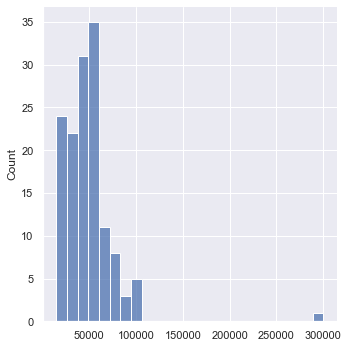

In [4]:
seaborn_displot(salary['salary_from'])


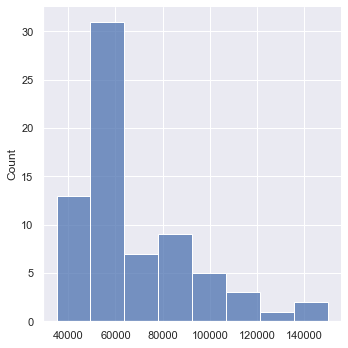

In [5]:
seaborn_displot(salary['salary_to'])

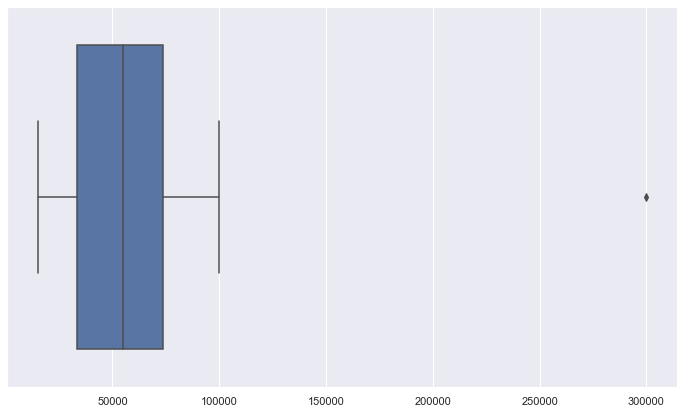

In [6]:
seaborn_boxplot(salary['salary_from'])


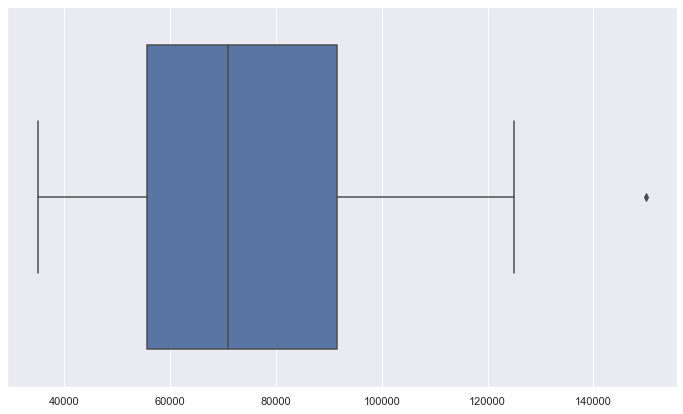

In [7]:
seaborn_boxplot(salary['salary_to'])


In [8]:
print(salary_avg)

{'salary_from_avg': 49318.0, 'salary_to_avg': 66437.0}
